# Project Name - Netflix Movies and TV show 

project Type - EDA

Contribution - Individual

Name : Abhijna S Rao

# Project Summary -

Netflix is the world’s leading subscription-based streaming platform, offering a vast collection of movies, TV series, documentaries, and original content to over 200 million users across more than 190 countries. Known for revolutionizing the way people consume media, Netflix has shifted its strategy over the years to prioritize original and region-specific content to retain and grow its subscriber base.

This project presents a comprehensive Exploratory Data Analysis (EDA) of the Netflix content catalog as of 2019. The dataset, sourced from Flixable (a third-party Netflix search engine), includes information about each title’s type (movie or TV show), country of availability, release year, cast, directors, and more.

The goal of the project is to understand how Netflix has evolved its content strategy, including the growing emphasis on TV shows over movies, the distribution of content across different countries, and trends in content production over the years. It also includes a UMB rule analysis to simulate how users might interact with different types of content and identify patterns that could influence recommendation systems.

By uncovering these insights, the project not only highlights Netflix’s global strategy and content shifts but also demonstrates how data-driven analysis can inform strategic decision-making in digital media platforms.

# GitHub Link - 

**https://github.com/Raoabhijna/NetflixEDA_Project**


# Problem Statement -

With over 200 million subscribers worldwide, Netflix constantly adjusts its content strategy. However, there has been a noticeable shift in the type of content offered—more TV shows and fewer movies. There's also limited clarity on what kind of content is available in different countries and how this distribution aligns with global user preferences. Without proper analysis, Netflix risks missing key opportunities for engagement and growth.

**Business Objective -**
The primary objective is to extract actionable insights from Netflix's catalog that help answer the following:

- What types of content are most dominant?

- How does content availability vary by country?

- Has Netflix shifted its focus from movies to TV shows over time?

- What behavioral patterns (via UMB rule analysis) can be observed that may influence user engagement?

These insights can help in data-driven decision-making for content acquisition, regional licensing, and user personalization strategies.

**Know Your Data**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset

df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [3]:
# Dataset First Look

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.shape

(7787, 12)

In [7]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Dataset Duplicate Value Count

df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Understanding Your Variables**

In [10]:
# Dataset Columns

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [12]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [13]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3177,s3178,Movie,Jimmy Carr: Funny Business,Sam Wrench,Jimmy Carr,United Kingdom,"March 18, 2016",2016,TV-MA,62 min,Stand-Up Comedy,British comedian Jimmy Carr unleashes his dead...


In [14]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Data Wrangling

In [15]:
# Splits string values into lists and explodes them into separate rows for specified columns.

unnesting = ['director', 'cast', 'listed_in','country']
for column in unnesting:
    df[column] = df[column].str.split(', ')
    df = df.explode(column)

In [16]:
df.shape

(176035, 12)

In [17]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [18]:
df.reset_index(drop=True,inplace=True)

In [19]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s1,TV Show,3%,NaN,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,TV Dramas,In a future where the elite inhabit an island ...
2,s1,TV Show,3%,NaN,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
3,s1,TV Show,3%,NaN,Bianca Comparato,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
4,s1,TV Show,3%,NaN,Bianca Comparato,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,TV Dramas,In a future where the elite inhabit an island ...
...,...,...,...,...,...,...,...,...,...,...,...,...
176030,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,Canada,"March 1, 2020",2019,TV-MA,90 min,Documentaries,This documentary delves into the mystique behi...
176031,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United States,"March 1, 2020",2019,TV-MA,90 min,Documentaries,This documentary delves into the mystique behi...
176032,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,"March 1, 2020",2019,TV-MA,90 min,Music & Musicals,This documentary delves into the mystique behi...
176033,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,Canada,"March 1, 2020",2019,TV-MA,90 min,Music & Musicals,This documentary delves into the mystique behi...


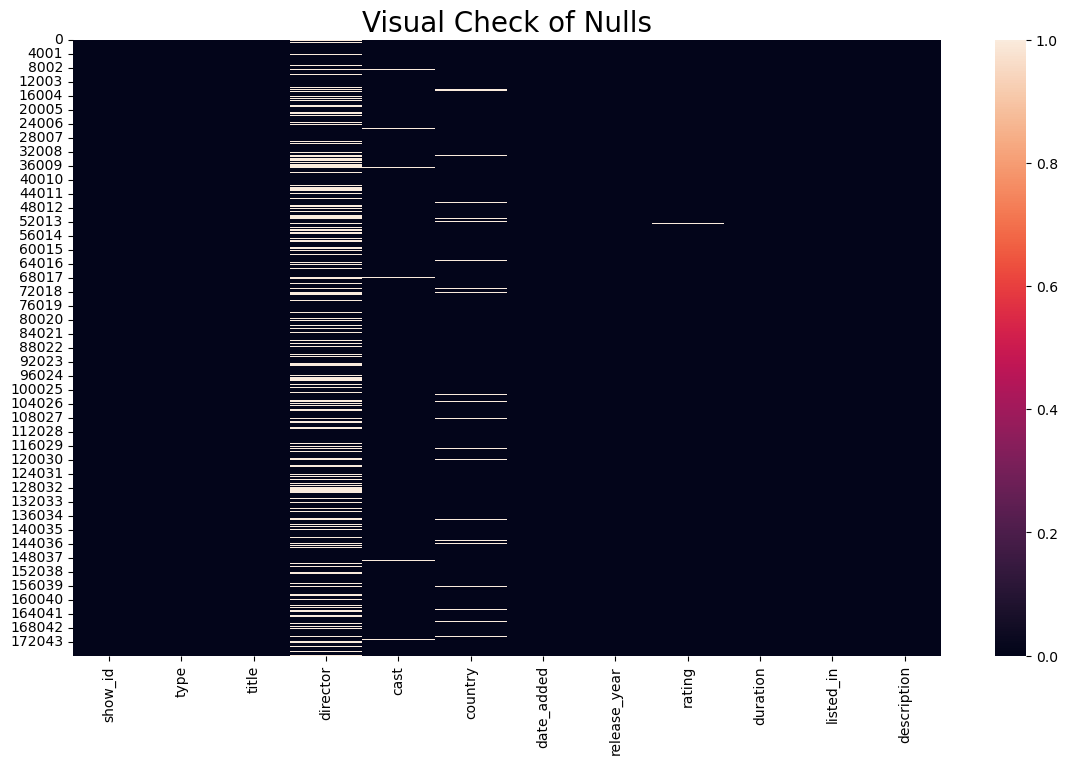

In [20]:
#Treating Null Values

plt.figure(figsize=(14,8))
sns.heatmap(df.isnull())
plt.title('Visual Check of Nulls',fontsize=20)
plt.show()

In [21]:
df.isna().sum().sort_values(ascending=False)

director        45995
country          5947
cast             1867
date_added        158
rating             70
show_id             0
type                0
title               0
release_year        0
duration            0
listed_in           0
description         0
dtype: int64

In [22]:
df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5738,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ..."
5739,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ..."
5740,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Dramas,"Set during the Russian Revolution, this comic ..."
5741,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ..."
5742,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
133767,s6066,TV Show,The Adventures of Figaro Pho,NaN,Charlotte Hamlyn,Australia,NaN,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ..."
133768,s6066,TV Show,The Adventures of Figaro Pho,NaN,Stavroula Mountzouris,Australia,NaN,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ..."
133769,s6066,TV Show,The Adventures of Figaro Pho,NaN,Stavroula Mountzouris,Australia,NaN,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ..."
133770,s6066,TV Show,The Adventures of Figaro Pho,NaN,Aletheia Burney,Australia,NaN,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ..."


In [23]:
#Converting date_added column to datetime format

df['date_added'] = pd.to_datetime(df['date_added'] ,format="%B %d, %Y" , errors='coerce')

In [24]:
# Fills missing values in the 'date_added' column with the most frequent date.

df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [25]:
df.isna().sum().sort_values(ascending=False)

director        45995
country          5947
cast             1867
rating             70
show_id             0
type                0
title               0
date_added          0
release_year        0
duration            0
listed_in           0
description         0
dtype: int64

In [26]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [27]:
# Extract the year from the 'date_added' column and store it in a new column 'year_added'

df['year_added'] = df['date_added'].dt.year

In [28]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
69264,s3065,Movie,Ishq Vishk,Ken Ghosh,Shahid Kapoor,India,2020-09-28,2003,TV-PG,129 min,International Movies,When the duplicitous Rajiv expresses his love ...,2020


In [29]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int64
dtype: object

In [30]:
df.shape

(176035, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176035 entries, 0 to 176034
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       176035 non-null  object        
 1   type          176035 non-null  object        
 2   title         176035 non-null  object        
 3   director      130040 non-null  object        
 4   cast          174168 non-null  object        
 5   country       170088 non-null  object        
 6   date_added    176035 non-null  datetime64[ns]
 7   release_year  176035 non-null  int64         
 8   rating        175965 non-null  object        
 9   duration      176035 non-null  object        
 10  listed_in     176035 non-null  object        
 11  description   176035 non-null  object        
 12  year_added    176035 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 17.5+ MB


In [32]:
df.isna().sum().sort_values(ascending=False)

director        45995
country          5947
cast             1867
rating             70
show_id             0
type                0
title               0
date_added          0
release_year        0
duration            0
listed_in           0
description         0
year_added          0
dtype: int64

In [33]:
# Fill missing values in the 'country','cast','director','rating' column with "Unknown"

df["country"].fillna("Unknown",inplace=True)
df["cast"].fillna("Unknown actors",inplace=True)
df["director"].fillna("Unknown director",inplace=True)
df["rating"].fillna("Unknown",inplace=True)

In [34]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [35]:
#separating movies and tv show data into seperate csv file and cleaning both the files

df.type.value_counts()

Movie      126091
TV Show     49944
Name: type, dtype: int64

In [36]:
#movies data

movies_data = df[df.type=='Movie']

In [37]:
movies_data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
95202,s4311,Movie,My Daddy is in Heaven,Waymon Boone,Jill Morrison,United States,2018-06-12,2017,TV-14,95 min,Faith & Spirituality,"After the sudden loss of her husband, a mother...",2018


In [38]:
movies_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [39]:
#TV Show data

tvshows_data = df[df.type=='TV Show']

In [40]:
tvshows_data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
150601,s6704,TV Show,The New Legends of Monkey,Unknown director,Jordan Mooney,New Zealand,2020-08-07,2020,TV-PG,2 Seasons,TV Sci-Fi & Fantasy,A valiant girl liberates the Monkey King – a g...,2020


In [41]:
tvshows_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [42]:
# Extract the number of minutes from the 'duration' column for movies
# Extract the number of seasons from the 'duration' column for TV shows

movies_data = df[df['type'] == 'Movie'].copy()
movies_data['runtime_in_mins'] = movies_data['duration'].str.split(' ').str[0]

tvshows_data = df[df['type'] == 'TV Show'].copy()
tvshows_data['no_of_seasons'] = tvshows_data['duration'].str.split(' ').str[0]


In [43]:
movies_data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,runtime_in_mins
5476,s246,Movie,A Twelve Year Night,Álvaro Brechner,Mirella Pascual,Uruguay,2018-12-28,2018,TV-MA,122 min,Dramas,Future Uruguayan president José Mujica and his...,2018,122


In [44]:
tvshows_data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,no_of_seasons
115093,s5217,TV Show,Rise of Empires: Ottoman,Unknown director,Damla Sönmez,Unknown,2020-01-24,2020,TV-MA,1 Season,Docuseries,Ottoman Sultan Mehmed II wages an epic campaig...,2020,1


In [45]:
movies_data.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
listed_in                  object
description                object
year_added                  int64
runtime_in_mins            object
dtype: object

In [46]:
# Convert the 'runtime_in_mins' column to integer type

movies_data.runtime_in_mins = movies_data.runtime_in_mins.astype(int)

In [47]:
movies_data.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
listed_in                  object
description                object
year_added                  int64
runtime_in_mins             int32
dtype: object

In [48]:
# Drop the 'description' and 'duration' columns from the movies_data DataFrame and reset the index

movies_data = movies_data.drop(columns=['description','duration']).reset_index(drop=True)

In [49]:
tvshows_data.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
year_added                int64
no_of_seasons            object
dtype: object

In [50]:
# Convert the 'no_of_seasons' column to integer type

tvshows_data.no_of_seasons = tvshows_data.no_of_seasons.astype(int)

In [51]:
tvshows_data.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
year_added                int64
no_of_seasons             int32
dtype: object

In [52]:
# Drop the 'description' and 'duration' columns from the tvshows_data DataFrame and reset the index

tvshows_data = tvshows_data.drop(columns=['description','duration']).reset_index(drop=True)

In [53]:
tvshows_data.sample(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,year_added,no_of_seasons
33117,s5356,TV Show,Sam & Cat,Unknown director,Eduardo Drummond,United States,2019-11-05,2014,TV-PG,Kids' TV,2019,2
40539,s6465,TV Show,The House of Flowers,Unknown director,Verónica Castro,Mexico,2020-04-23,2020,TV-MA,TV Comedies,2020,3
7722,s1413,TV Show,Classic Legends,Unknown director,Javed Akhtar,India,2017-05-15,2012,TV-PG,International TV Shows,2017,1
11612,s1872,TV Show,DreamWorks Shrek's Swamp Stories,Unknown director,Mike Myers,United States,2020-02-17,2008,TV-PG,Kids' TV,2020,1


In [54]:
# Drop the 'description' column from the original DataFrame and reset the index

df = df.drop(columns=['description']).reset_index(drop=True)

In [55]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,TV Show,3%,Unknown director,João Miguel,Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,2020
1,s1,TV Show,3%,Unknown director,João Miguel,Brazil,2020-08-14,2020,TV-MA,4 Seasons,TV Dramas,2020
2,s1,TV Show,3%,Unknown director,João Miguel,Brazil,2020-08-14,2020,TV-MA,4 Seasons,TV Sci-Fi & Fantasy,2020
3,s1,TV Show,3%,Unknown director,Bianca Comparato,Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,2020
4,s1,TV Show,3%,Unknown director,Bianca Comparato,Brazil,2020-08-14,2020,TV-MA,4 Seasons,TV Dramas,2020


In [56]:
df.type.value_counts()

Movie      126091
TV Show     49944
Name: type, dtype: int64

In [57]:
# saving the files for further analysis:

df.to_csv('netflix_data.csv',sep=',',index=False)
movies_data.to_csv('movies_data.csv',sep=',',index=False)
tvshows_data.to_csv('tvshows_data.csv',sep=',',index=False)

# Exploration of Data Analysis (EDA)

In [58]:
nd = pd.read_csv('netflix_data.csv')
md = pd.read_csv('movies_data.csv')
tvd = pd.read_csv('tvshows_data.csv')

**How contents are distributed in Netflix?**

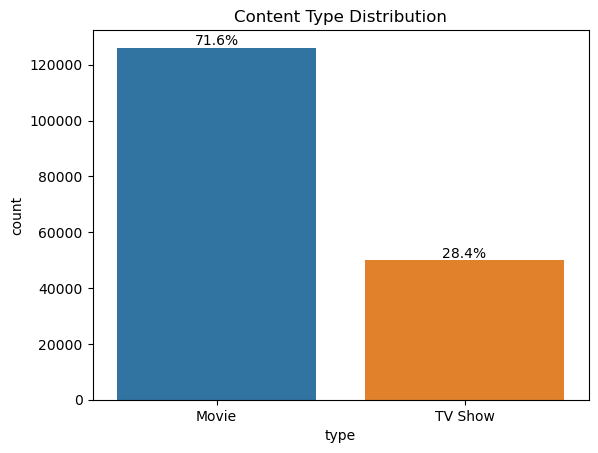

In [59]:
ax = sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Content Type Distribution")
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

**insight:** Movies make up the majority of content on Netflix, but TV Shows also have a significant presence, indicating Netflix’s growing focus on serialized content.

**How Netflix Content Varies Across Countries?**

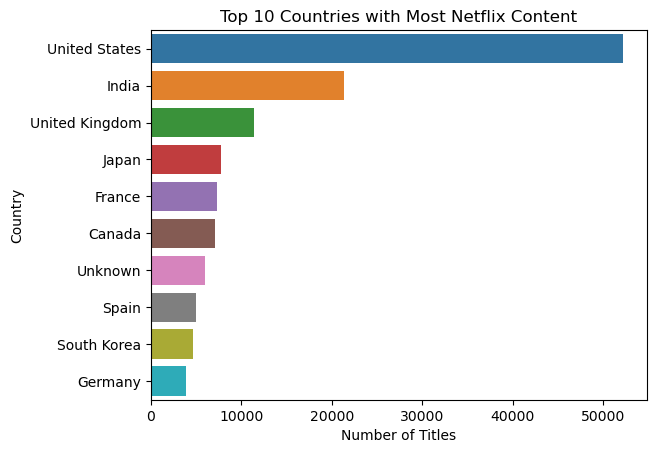

In [60]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


**insight:** The U.S. dominates Netflix’s catalog, followed by India and the UK. India leans more toward movies, while others show a balanced mix of movies and TV shows.

**Has Netflix Shifted Its Focus from Movies to TV Shows in Recent Years?**

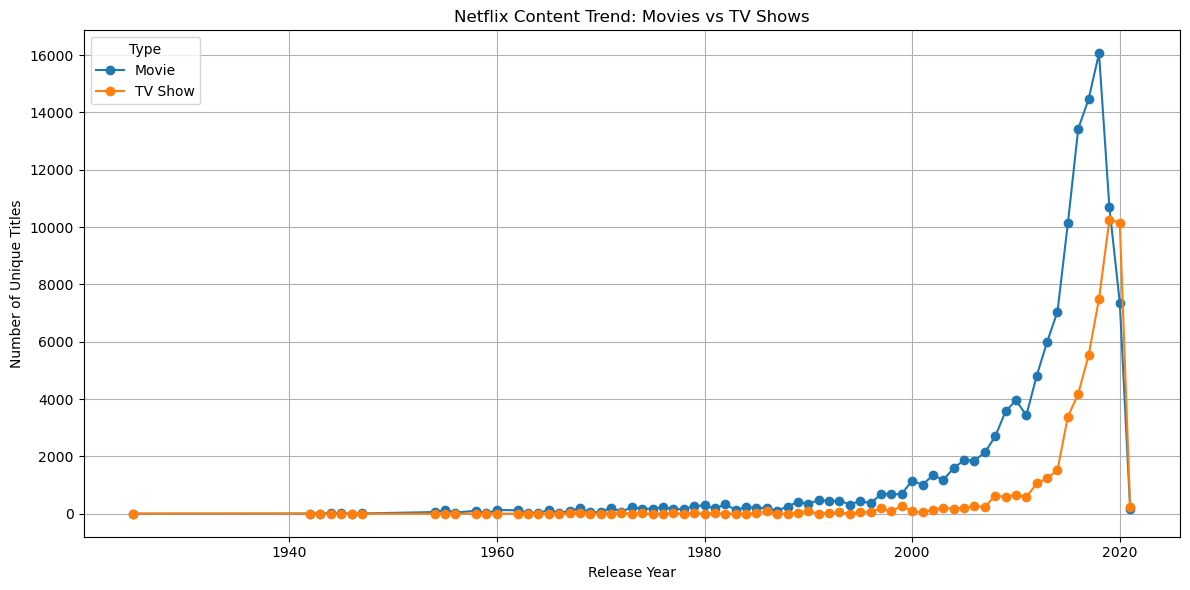

In [61]:
year_type_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
year_type_counts.plot(kind='line', ax=plt.gca(), marker='o')
plt.title("Netflix Content Trend: Movies vs TV Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Unique Titles")
plt.legend(title="Type")
plt.grid(True)
plt.tight_layout()
plt.show()

**insight:** The chart highlights a shift in Netflix's content strategy, with movies dominating until 2016-2018. From 2019 onwards, TV shows have steadily increased, outpacing movies since 2020. This pivot toward serialized content aligns with the industry's focus on binge-worthy series to drive user engagement and retention.


**Univariate Analysis**

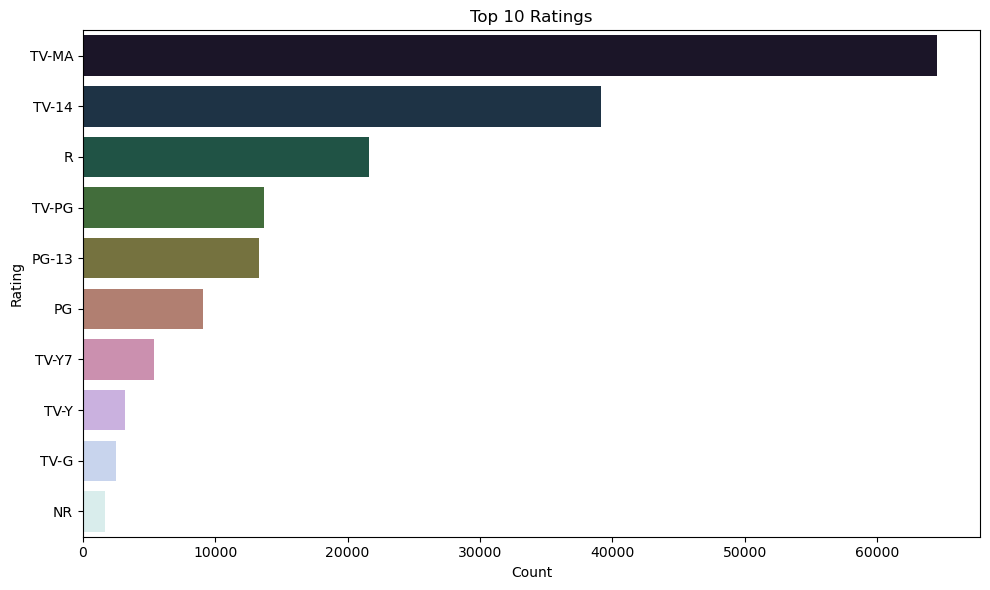

In [62]:
# Top 10 ratings

plt.figure(figsize=(10, 6))
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(y=top_ratings.index, x=top_ratings.values, palette="cubehelix")
plt.title("Top 10 Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

**insight:**
- TV-MA is the most common rating on Netflix.

- Followed by TV-14 and TV-PG.

- Mature content (TV-MA, R) dominates the platform.

- Kids’ content (TV-Y, TV-Y7, PG, TV-G) is present but less frequent.

- NR (Not Rated) has the fewest entries among the top 10.

**Bivariate Analysis**

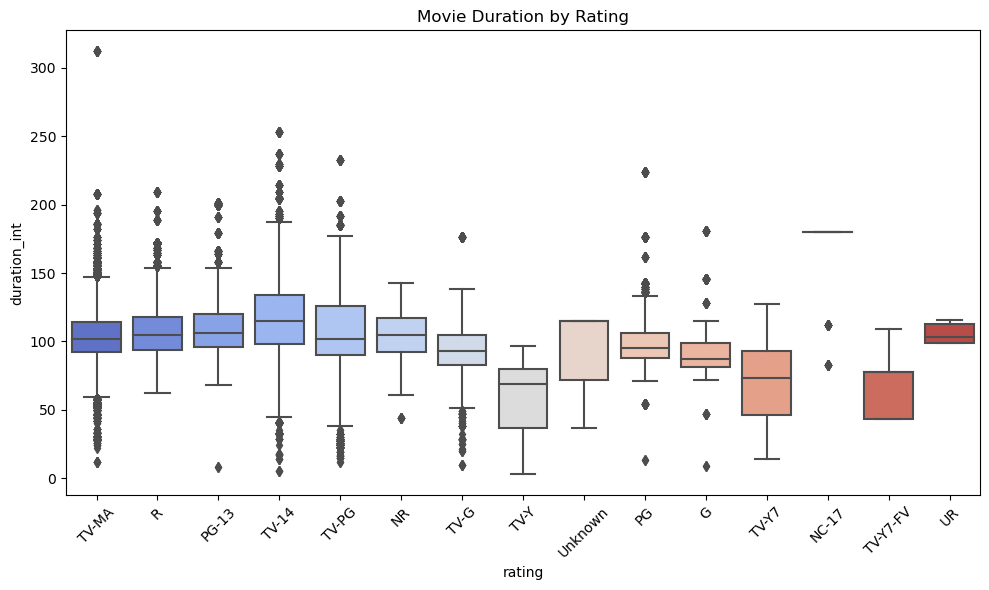

In [63]:
# Rating vs Duration (Numerical - Categorical)

df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('(min|Season)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['type'] == 'Movie'], x='rating', y='duration_int', palette="coolwarm")
plt.title("Movie Duration by Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**insight:**
- TV-MA, R, PG-13, TV-14 → Longer durations.

- TV-Y, TV-G, G → Shorter durations.

- TV-14 → Widest range.

- UR → Consistent durations.

- Many outliers in mature categories.

**Multivariate Analysis**

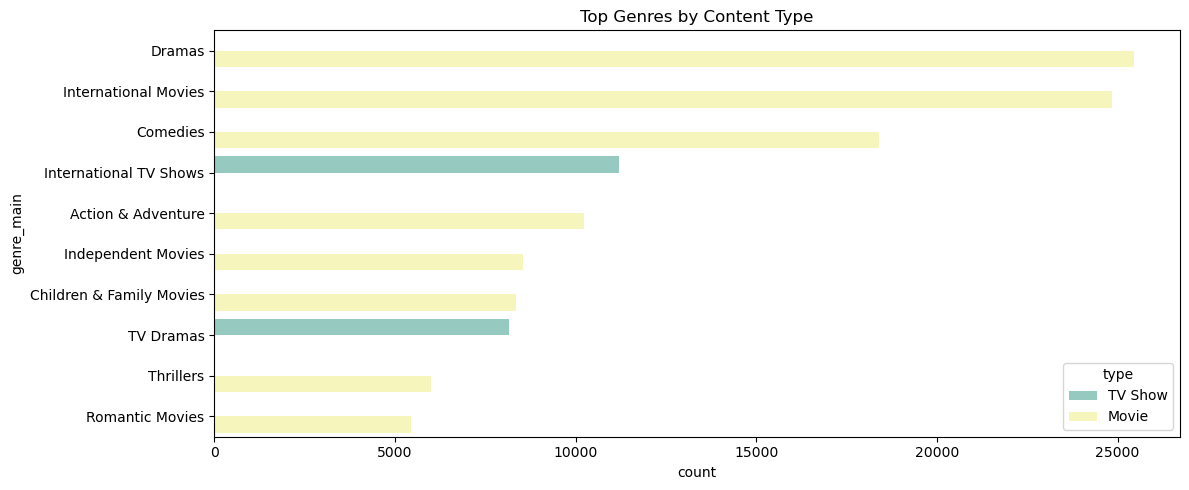

In [64]:
# Genre vs Type Analysis

df['genre_main'] = df['listed_in'].str.split(',').str[0]
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='genre_main', hue='type', order=df['genre_main'].value_counts().index[:10], palette='Set3')
plt.title("Top Genres by Content Type")
plt.tight_layout()
plt.show()

**insight:**
- Dramas and Comedies are the most popular genres, mostly as Movies.

- International TV Shows, Crime TV Shows, and Kids' TV are dominated by TV Shows.

- Documentaries and Action & Adventure are common in both Movies and TV Shows.

- Children & Family Movies, Stand-Up Comedy, and Horror Movies are mostly Movies.

# Solution to Business Objective 

To achieve the business objective, we recommend that the client leverage data analysis to understand content trends across time and regions. By performing exploratory analysis, Netflix can track the shift from movies to TV shows and identify which types of content are most prevalent in different countries.Integrating external data like IMDb or Rotten Tomatoes ratings can also guide quality-focused content decisions. Ultimately, these insights can support Netflix in tailoring its catalog by region, enhancing viewer engagement, and optimizing its global content strategy.

# 🧾Conclusion

This project provides valuable insights into Netflix's evolving content strategy and global catalog distribution. Through exploratory data analysis, we observed a clear shift from movies to TV shows over recent years, reflecting changing viewer preferences and strategic business decisions. Analyzing content by country revealed regional differences in content types and potential opportunities for localized offerings. By integrating external ratings data, Netflix can also focus on content quality. These findings empower the client to make data-driven decisions to enhance user satisfaction, retention, and market-specific content strategies.
